First 5 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  HasCabin  
0      0         A/5 21171   7.2500   NaN        S     False  
1      0          PC 17599  71.2833   C85        C      True  
2      0  STON/O2. 3101282   7.9250   NaN        S     False  
3      0            113803  53.1000  C123        S   

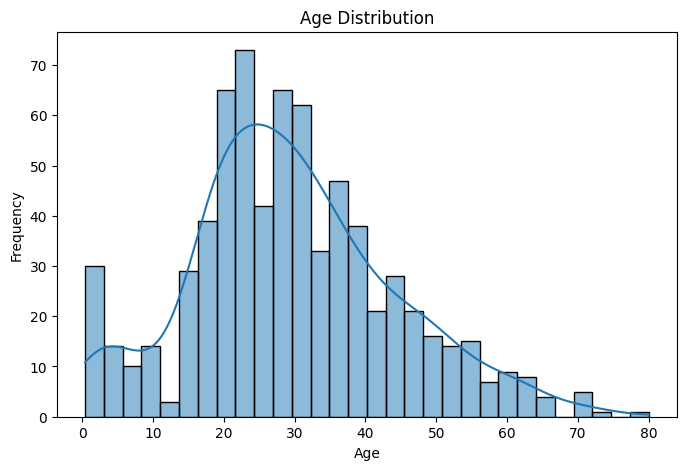

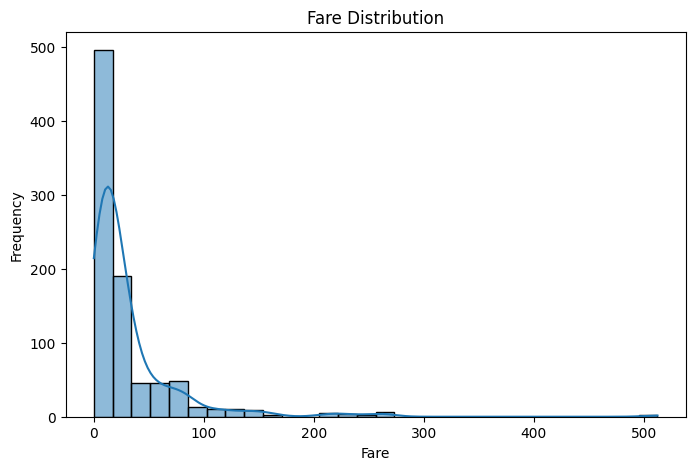

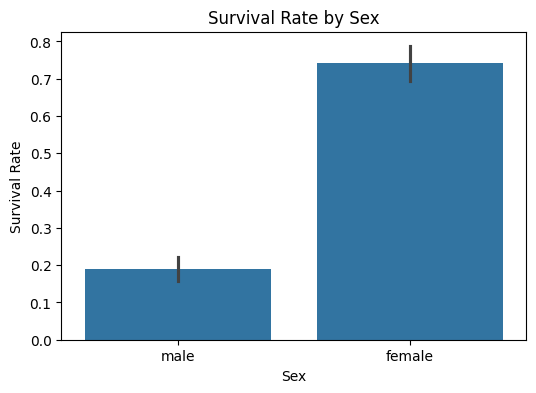

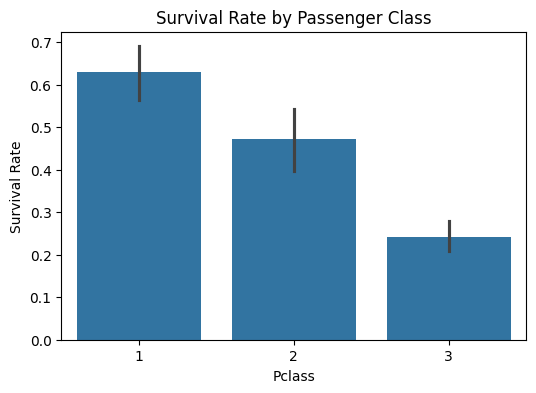

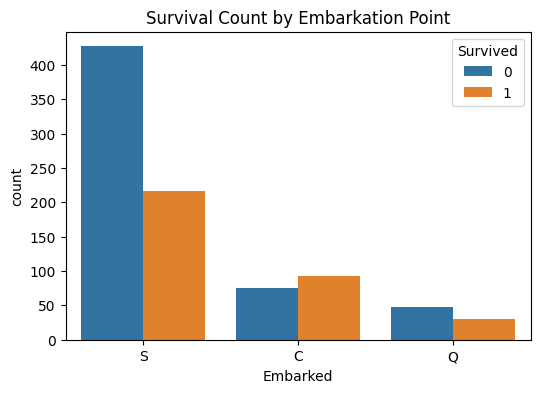

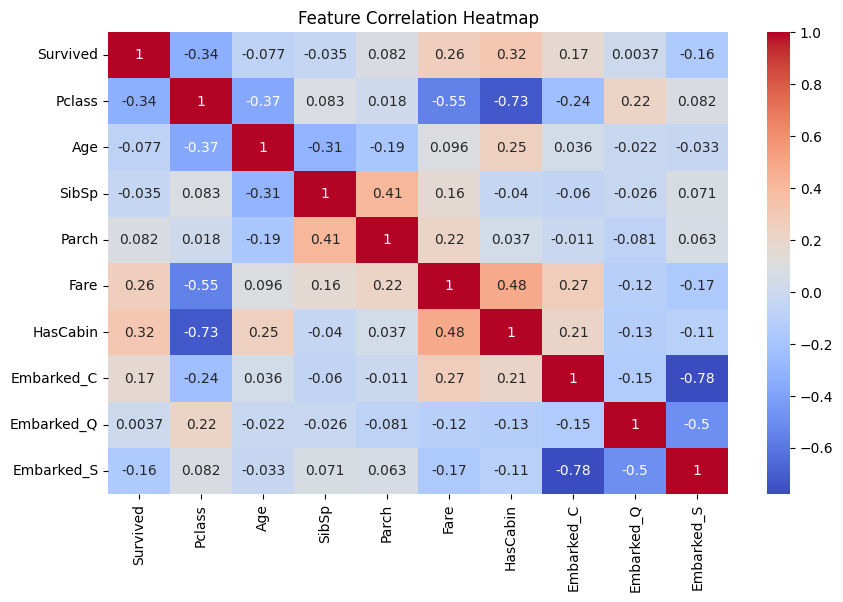

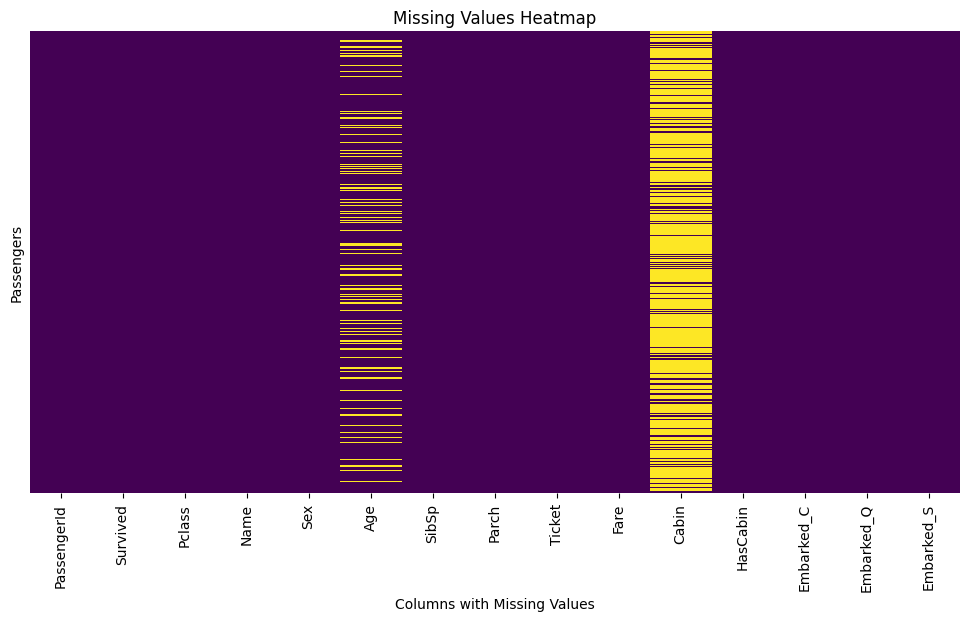

In [1]:
# titanic_exploration.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('OriginalData/train.csv')
df['HasCabin'] = df['Cabin'].notnull()


# Basic overview
print("First 5 rows:\n", df.head())
print("\nDataset Info:\n")
df.info()
print("\nMissing values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary statistics:\n", df.describe(include='all'))

# Visual: Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visual: Fare distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Bar plot: Survival rate by sex
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()

# Bar plot: Survival rate by class
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Count plot: Embarked
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count by Embarkation Point')
plt.show()

df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked', dummy_na=False)

# Correlation heatmap
plt.figure(figsize=(10, 6))
corr = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'HasCabin', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.xlabel('Columns with Missing Values')
plt.ylabel('Passengers')
plt.show()
